<a href="https://colab.research.google.com/github/Royingame/Air-Quality-Index-/blob/main/Air_Quality_Index_Project(Data%20Cleaning%20%26%20Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Let's import the necessary libraries   

In [ ]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Lets import the dataset!
url = 'https://raw.githubusercontent.com/Royingame/Air-Quality-Index-/main/waqi-covid19-airqualitydata-2020.csv'
Air_data = pd.read_csv(url, sep='delimiter', header=None, engine = 'python')

In [ ]:
Air_data.head(15)

,0
0,# Daily air quality and meteorological measure...
1,# By using this data you agree with the terms ...
2,# For more information check: https://aqicn.or...
3,# Data-Set Generated on 2021-07-29T01:10:35+01:00
4,"Date,Country,City,Specie,count,min,max,median,..."
5,"2021-03-17,CH,Zürich,dew,42,-1.5,1.5,1.0,4.78"
6,"2021-07-13,CH,Zürich,dew,38,11.0,16.5,12.0,19.40"
7,"2021-03-02,CH,Zürich,dew,46,-5.0,2.0,-1.5,34.59"
8,"2021-03-05,CH,Zürich,dew,44,-1.0,5.0,2.0,47.69"
9,"2021-04-03,CH,Zürich,dew,44,-4.5,1.0,-1.5,29.80"


#### Lets ***Clean*** the raw dataset! 

In [ ]:
# Remove the first four rows from the raw dataset
Air_data.drop(index=Air_data.index[0:4], 
        axis=0, 
        inplace=True)
Air_data.head()

,0
4,"Date,Country,City,Specie,count,min,max,median,..."
5,"2021-03-17,CH,Zürich,dew,42,-1.5,1.5,1.0,4.78"
6,"2021-07-13,CH,Zürich,dew,38,11.0,16.5,12.0,19.40"
7,"2021-03-02,CH,Zürich,dew,46,-5.0,2.0,-1.5,34.59"
8,"2021-03-05,CH,Zürich,dew,44,-1.0,5.0,2.0,47.69"


In [ ]:
# Now set the first row as header
new_header = Air_data.iloc[0]
Air_data = Air_data[1:]
Air_data.columns = new_header

#Lets check whether it worked or not :)
Air_data.head()

4,"Date,Country,City,Specie,count,min,max,median,variance"
5,"2021-03-17,CH,Zürich,dew,42,-1.5,1.5,1.0,4.78"
6,"2021-07-13,CH,Zürich,dew,38,11.0,16.5,12.0,19.40"
7,"2021-03-02,CH,Zürich,dew,46,-5.0,2.0,-1.5,34.59"
8,"2021-03-05,CH,Zürich,dew,44,-1.0,5.0,2.0,47.69"
9,"2021-04-03,CH,Zürich,dew,44,-4.5,1.0,-1.5,29.80"


In [ ]:
# Still we have some issues we need to separate the columns 
# Lets first save this panda DataFrame into a new csv file
Air_data.to_csv('New_Air_data', index=False)

In [ ]:
New_Air_data = pd.read_csv('/content/New_Air_data', sep = '\,', engine='python')
New_Air_data.head()

,"""Date",Country,City,Specie,count,min,max,median,"variance"""
0,"""2021-03-17",CH,Zürich,dew,42,-1.5,1.5,1.0,"4.78"""
1,"""2021-07-13",CH,Zürich,dew,38,11.0,16.5,12.0,"19.40"""
2,"""2021-03-02",CH,Zürich,dew,46,-5.0,2.0,-1.5,"34.59"""
3,"""2021-03-05",CH,Zürich,dew,44,-1.0,5.0,2.0,"47.69"""
4,"""2021-04-03",CH,Zürich,dew,44,-4.5,1.0,-1.5,"29.80"""


#### Now we will remove the inverted commas from the dataset!
It will be done in two parts:
  1. First we will remove " from the DataFrame contents.
  2. Then, we will remove " from the DataFrame header.


In [ ]:
# Converting the entire DataFrame into string
New_Air_data = New_Air_data.applymap(str)

# Now we will use a for loop to iterate through DataFrame contents to remove "
for i, col in enumerate(New_Air_data.columns):
    New_Air_data.iloc[:, i] = New_Air_data.iloc[:, i].str.replace('"', '')

# Lets check it has worked or not
New_Air_data.head()

,"""Date",Country,City,Specie,count,min,max,median,"variance"""
0,2021-03-17,CH,Zürich,dew,42,-1.5,1.5,1.0,4.78
1,2021-07-13,CH,Zürich,dew,38,11.0,16.5,12.0,19.40
2,2021-03-02,CH,Zürich,dew,46,-5.0,2.0,-1.5,34.59
3,2021-03-05,CH,Zürich,dew,44,-1.0,5.0,2.0,47.69
4,2021-04-03,CH,Zürich,dew,44,-4.5,1.0,-1.5,29.80


In [ ]:
# Now lets continue to the 2nd part of the process
new_headers = []

for header in New_Air_data.columns: # New_Air_data.columns is your list of headers
    header = header.strip('"') # Remove the quotes off each header
    new_headers.append(header) # Save the new strings without the quotes

New_Air_data.columns = new_headers

# Lets check it has worked or not
New_Air_data.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2021-03-17,CH,Zürich,dew,42,-1.5,1.5,1.0,4.78
1,2021-07-13,CH,Zürich,dew,38,11.0,16.5,12.0,19.40
2,2021-03-02,CH,Zürich,dew,46,-5.0,2.0,-1.5,34.59
3,2021-03-05,CH,Zürich,dew,44,-1.0,5.0,2.0,47.69
4,2021-04-03,CH,Zürich,dew,44,-4.5,1.0,-1.5,29.80


#### * Now save the DataFrame into a new Dataset to work with directly and import it whenever necessary!

In [ ]:
New_Air_data.to_csv('Cleaned_Air_data')

In [ ]:
Cleaned_Air_data = pd.read_csv('/content/Cleaned_Air_data')
Cleaned_Air_data.shape # To check the shape of the dataset

(1279807, 10)

#### Lets look at different ***feature attributes*** of the dataset

In [ ]:
Cleaned_Air_data['Country'].unique(), Cleaned_Air_data['Country'].unique().shape

(array(['CH', 'GH', 'IL', 'TJ', 'TM', 'UZ', 'BR', 'EE', 'GE', 'IN', 'BA',
        'BD', 'EC', 'KZ', 'ML', 'MM', 'NO', 'PR', 'PT', 'RE', 'XK', 'CA',
        'CY', 'IQ', 'JO', 'LK', 'MY', 'CI', 'CO', 'GB', 'HU', 'IS', 'MN',
        'RO', 'AE', 'AR', 'BG', 'DK', 'ES', 'GT', 'IE', 'IT', 'LT', 'MO',
        'NZ', 'TH', 'ZA', 'CN', 'DE', 'GR', 'HK', 'PE', 'PK', 'SK', 'BH',
        'MX', 'RU', 'TR', 'UA', 'GN', 'KW', 'TW', 'AT', 'BE', 'ID', 'JP',
        'KG', 'MK', 'SG', 'CW', 'PL', 'SV', 'AF', 'PH', 'CL', 'CZ', 'FR',
        'HR', 'NL', 'AU', 'ET', 'IR', 'LA', 'RS', 'VN', 'CR', 'DZ', 'FI',
        'KR', 'NP', 'UG', 'SA', 'SE', 'US'], dtype=object), (94,))

* There are 94 unique countries whose data are given in the dataset and is reprersented by unique code 
* The codes for different countries can be found [here](https://aqicn.org/data-platform/covid19/)

In [ ]:
Cleaned_Air_data['City'].unique().shape # to display name of all cities you can use "Cleaned_Air_data['City'].unique()"

(610,)

* There are 610 cities among 94 countries whose data we have, to calculate Air Quality Index

#### Lets check the condition that we need to consider to calculate AQI level

In [ ]:
New_Air_data['Specie'].unique()

array(['dew', 'humidity', 'so2', 'pm25', 'wind-gust', 'temperature',
       'pm10', 'o3', 'no2', 'pressure', 'wind-speed', 'co', 'wd',
       'precipitation', 'aqi', 'uvi', 'pm1', 'mepaqi', 'neph'],
      dtype=object)

In [ ]:
# Lets check the Date entry record of the data
New_Air_data['Date'].min(),  New_Air_data['Date'].max()

('2020-12-28', '2021-07-29')

##### So, to conclude we have data record ranging from `Date` '2020-12-28' to '2021-07-29' i.e of 7 months from '94' different `Countries` scattered across '610' `Cities` with primary focus on all the necessary required information regarding `dew`, `humidity`, `so2`, `pm25`, `wind-gust`, `temperature`,`pm10`, `o3`, `no2`, `pressure`, `wind-speed`, `co`, `wd`,`precipitation`, `aqi`, `uvi`, `pm1`, `mepaqi`, `neph` their level or count values to calculate Air Quality Index of respective places 

# Lets separate the data based on Country
Q. Why I am doing this?
- Every country has their standards of measuring Air Quality Index and based on the value of AQI, they labelled it whether the air quality is Good, Moderate or Bad.
  I will be using India's data and will follow Indian standards of measurement of AQI level published by `Central Pollution Control Board (CPCB)` 
  following `National Ambient Air Quality Standards (NAAQS)`

Here is an [Article](https://fit.thequint.com/health-news/explaining-air-quality-index) that will solve your most of the questions regarding this domain.

In [ ]:
# Getting Final Data ready to perform various Data Operations tasks, visualization and Model Building
Final_Air_data = New_Air_data.loc[New_Air_data['Country'] == 'IN']

In [ ]:
Final_Air_data.reset_index(drop=True, inplace = True)
Final_Air_data.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2021-01-04,IN,Thrissur,o3,48,0.3,13.9,1.2,131.04
1,2021-02-15,IN,Thrissur,o3,44,0.8,22.8,3.5,454.95
2,2021-02-27,IN,Thrissur,o3,42,0.2,14.4,0.7,144.70
3,2021-03-04,IN,Thrissur,o3,43,0.3,20.7,3.2,465.96
4,2021-05-02,IN,Thrissur,o3,48,3.6,18.5,11.7,295.92


In [ ]:
Final_Air_data.shape

(53707, 9)

* We will drop the count, min , max, median and variance attributes as mentioned by `CPCB` and will make 
 a new feature attribute 24 hr avg. or basicall find `mean` to calculate AQI of a particular pollutant for this we first 
 need to utilize the values from `min` and `max` 

In [ ]:
Final_Air_data.drop(['count','median','variance'], inplace = True, axis = 1)
Final_Air_data['min'] = Final_Air_data['min'].astype(str).astype(float)
Final_Air_data['max'] = Final_Air_data['max'].astype(str).astype(float)
Final_Air_data = Final_Air_data.assign(avg=Final_Air_data.loc[:, ["min", "max"]].mean(axis=1))
Final_Air_data.to_csv('Final_Air_data')
Final_Air_data.head()

,Date,Country,City,Specie,min,max,avg
0,2021-01-04,IN,Thrissur,o3,0.3,13.9,7.10
1,2021-02-15,IN,Thrissur,o3,0.8,22.8,11.80
2,2021-02-27,IN,Thrissur,o3,0.2,14.4,7.30
3,2021-03-04,IN,Thrissur,o3,0.3,20.7,10.50
4,2021-05-02,IN,Thrissur,o3,3.6,18.5,11.05


In [ ]:
Final_Air_data.drop(['min','max'],inplace=True, axis=1)
Final_Air_data.head()

,Date,Country,City,Specie,avg
0,2021-01-04,IN,Thrissur,o3,7.10
1,2021-02-15,IN,Thrissur,o3,11.80
2,2021-02-27,IN,Thrissur,o3,7.30
3,2021-03-04,IN,Thrissur,o3,10.50
4,2021-05-02,IN,Thrissur,o3,11.05


In [ ]:
Final_Air_data.to_csv('Prepared_Dataset')
Prepared_Dataset = pd.read_csv('/content/Prepared_Dataset')
Prepared_Dataset.drop(Prepared_Dataset.columns[0], axis = 1, inplace = True)

In [ ]:
Prepared_Dataset.head()

,Date,Country,City,Specie,avg
0,2021-01-04,IN,Thrissur,o3,7.10
1,2021-02-15,IN,Thrissur,o3,11.80
2,2021-02-27,IN,Thrissur,o3,7.30
3,2021-03-04,IN,Thrissur,o3,10.50
4,2021-05-02,IN,Thrissur,o3,11.05


In [ ]:
Prepared_Dataset['Specie'].unique()

array(['o3', 'so2', 'pressure', 'wind-speed', 'wind-gust', 'pm10',
       'humidity', 'temperature', 'pm25', 'no2', 'dew', 'co', 'wd',
       'precipitation'], dtype=object)

In [ ]:
o3_data = Prepared_Dataset.loc[Prepared_Dataset['Specie'] == 'o3']
so2_data = Prepared_Dataset.loc[Prepared_Dataset['Specie'] == 'so2']
pm10_data = Prepared_Dataset.loc[Prepared_Dataset['Specie'] == 'pm10']
pm25_data = Prepared_Dataset.loc[Prepared_Dataset['Specie'] == 'pm25']
no2_data = Prepared_Dataset.loc[Prepared_Dataset['Specie'] == 'no2']
co_data = Prepared_Dataset.loc[Prepared_Dataset['Specie'] == 'co']

In [ ]:
o3_data.drop(['Specie'], inplace=True,axis=1)
o3_data.rename(columns = {'avg':'o3'}, inplace = True)

so2_data.drop(['Specie'], inplace=True,axis=1)
so2_data.rename(columns = {'avg':'so2'}, inplace = True)

pm10_data.drop(['Specie'], inplace=True,axis=1)
pm10_data.rename(columns = {'avg':'pm10'}, inplace = True)

pm25_data.drop(['Specie'], inplace=True,axis=1)
pm25_data.rename(columns = {'avg':'pm25'}, inplace = True)

no2_data.drop(['Specie'], inplace=True,axis=1)
no2_data.rename(columns = {'avg':'no2'}, inplace = True)

co_data.drop(['Specie'], inplace=True,axis=1)
co_data.rename(columns = {'avg':'co'}, inplace = True)

In [ ]:
o3_data.head(), so2_data.head(), pm10_data.head(), pm25_data.head(), no2_data.head(), co_data.head()

(         Date Country      City     o3
 0  2021-01-04      IN  Thrissur   7.10
 1  2021-02-15      IN  Thrissur  11.80
 2  2021-02-27      IN  Thrissur   7.30
 3  2021-03-04      IN  Thrissur  10.50
 4  2021-05-02      IN  Thrissur  11.05,
            Date Country      City    so2
 214  2021-05-26      IN  Thrissur   5.25
 215  2021-06-08      IN  Thrissur   4.25
 216  2021-03-03      IN  Thrissur  26.80
 217  2021-05-01      IN  Thrissur   9.35
 218  2020-12-29      IN  Thrissur   9.65,
            Date Country      City  pm10
 868  2021-02-24      IN  Thrissur  48.0
 869  2021-05-16      IN  Thrissur  16.0
 870  2021-05-19      IN  Thrissur  16.5
 871  2021-07-05      IN  Thrissur  34.0
 872  2021-03-05      IN  Thrissur  59.0,
             Date Country      City   pm25
 1510  2021-01-11      IN  Thrissur   95.5
 1511  2021-06-02      IN  Thrissur   58.5
 1512  2021-06-27      IN  Thrissur   96.0
 1513  2021-04-19      IN  Thrissur  107.0
 1514  2021-06-28      IN  Thrissur   73.5,


In [ ]:
Prepared_Dataset['City'].unique()

array(['Thrissur', 'New Delhi', 'Hyderabad', 'Delhi', 'Chandigarh',
       'Bhopal', 'Nagpur', 'Lucknow', 'Ghāziābād', 'Hāpur', 'Gandhinagar',
       'Chennai', 'Nashik', 'Mysore', 'Visakhapatnam', 'Mumbai', 'Jaipur',
       'Patna', 'Muzaffarnagar', 'Thiruvananthapuram', 'Bengaluru',
       'Shillong', 'Kolkata'], dtype=object)

* Lets first sort all new created DataFrame with respect to `Date`

In [ ]:
o3_data.sort_values(by='Date', ascending=True, inplace=True)
o3_data.head()

,Date,Country,City,o3
22588,2020-12-28,IN,Hāpur,21.05
49386,2020-12-28,IN,Shillong,6.60
12906,2020-12-28,IN,Bhopal,19.85
25361,2020-12-28,IN,Gandhinagar,20.50
31339,2020-12-28,IN,Mysore,22.50


In [ ]:
so2_data.sort_values(by='Date', ascending=True, inplace=True)
so2_data.head()

,Date,Country,City,so2
15845,2020-12-28,IN,Nagpur,0.60
51095,2020-12-28,IN,Shillong,7.15
10851,2020-12-28,IN,Chandigarh,5.30
5909,2020-12-28,IN,Hyderabad,46.20
34058,2020-12-28,IN,Visakhapatnam,4.95


In [ ]:
pm10_data.sort_values(by='Date', ascending=True, inplace=True)
pm10_data.head()

,Date,Country,City,pm10
11866,2020-12-28,IN,Bhopal,188.0
34826,2020-12-28,IN,Mumbai,224.5
18272,2020-12-28,IN,Ghāziābād,169.5
21043,2020-12-28,IN,Hāpur,122.0
16847,2020-12-28,IN,Lucknow,544.5


In [ ]:
pm25_data.sort_values(by='Date', ascending=True, inplace=True)
pm25_data.head()

,Date,Country,City,pm25
18972,2020-12-28,IN,Ghāziābād,149.0
29586,2020-12-28,IN,Nashik,116.5
1689,2020-12-28,IN,Thrissur,155.5
17932,2020-12-28,IN,Lucknow,383.5
47691,2020-12-28,IN,Bengaluru,93.5


In [ ]:
co_data.sort_values(by='Date', ascending=True, inplace=True)
co_data.head()

,Date,Country,City,co
16482,2020-12-28,IN,Lucknow,41.80
41704,2020-12-28,IN,Patna,43.90
50784,2020-12-28,IN,Shillong,20.30
2235,2020-12-28,IN,Thrissur,16.60
52807,2020-12-28,IN,Kolkata,29.75


In [ ]:
no2_data.sort_values(by='Date', ascending=True, inplace=True)
no2_data.head()

,Date,Country,City,no2
8630,2020-12-28,IN,Delhi,80.50
4972,2020-12-28,IN,Hyderabad,28.15
42822,2020-12-28,IN,Muzaffarnagar,49.85
52528,2020-12-28,IN,Kolkata,57.60
25486,2020-12-28,IN,Chennai,7.20


In [ ]:
print(o3_data['City'].value_counts())
print(so2_data['City'].value_counts())
print(pm10_data['City'].value_counts())
print(pm25_data['City'].value_counts())
print(co_data['City'].value_counts())
print(no2_data['City'].value_counts())

Delhi                 214
Gandhinagar           214
Hyderabad             214
Bhopal                214
Jaipur                214
Kolkata               214
Chandigarh            214
Shillong              214
Lucknow               214
Mumbai                214
Thrissur              214
Chennai               214
Patna                 214
Bengaluru             214
Thiruvananthapuram    214
Hāpur                 214
Mysore                213
Ghāziābād             211
Visakhapatnam         211
Nashik                209
Nagpur                196
Muzaffarnagar         193
Name: City, dtype: int64
Delhi                 214
Shillong              214
Hyderabad             214
Bhopal                214
Jaipur                214
Muzaffarnagar         214
Kolkata               214
Chandigarh            214
Lucknow               214
Gandhinagar           214
Mumbai                214
Thrissur              214
Chennai               214
Patna                 214
Bengaluru             214
Thiruvanantha

* Now we will concat all the DataFrames based on Date column and then we will fill Nan values based on mean for that city!

In [ ]:
# Also before proceeding with concatanation, lets check the "Date" range of each datasets
print(o3_data['Date'].min(),o3_data['Date'].max())
print(so2_data['Date'].min(),so2_data['Date'].max())
print(pm10_data['Date'].min(),pm10_data['Date'].max())
print(pm25_data['Date'].min(),pm25_data['Date'].max())
print(co_data['Date'].min(),co_data['Date'].max())
print(no2_data['Date'].min(),no2_data['Date'].max())

2020-12-28 2021-07-29
2020-12-28 2021-07-29
2020-12-28 2021-07-29
2020-12-28 2021-07-29
2020-12-28 2021-07-29
2020-12-28 2021-07-29


* Since the "Date" range of all dataset are same, we will move forward with concatanation of the DataFrames

In [ ]:
Trial_df = pd.merge(pm25_data, so2_data, how='left', left_on=['Date','Country','City'], right_on = ['Date','Country','City'])
Trial_df.head()

,Date,Country,City,pm25,so2
0,2020-12-28,IN,Ghāziābād,149.0,35.70
1,2020-12-28,IN,Nashik,116.5,3.35
2,2020-12-28,IN,Thrissur,155.5,2.85
3,2020-12-28,IN,Lucknow,383.5,6.10
4,2020-12-28,IN,Bengaluru,93.5,6.05


In [ ]:
Trial_df2 = pd.merge(Trial_df, no2_data, how='left', left_on=['Date','Country','City'], right_on = ['Date','Country','City'])
Trial_df2.head()

,Date,Country,City,pm25,so2,no2
0,2020-12-28,IN,Ghāziābād,149.0,35.70,39.20
1,2020-12-28,IN,Nashik,116.5,3.35,20.25
2,2020-12-28,IN,Thrissur,155.5,2.85,3.15
3,2020-12-28,IN,Lucknow,383.5,6.10,46.70
4,2020-12-28,IN,Bengaluru,93.5,6.05,30.95


In [ ]:
Trial_df3 = pd.merge(Trial_df2, co_data, how='left', left_on=['Date','Country','City'], right_on = ['Date','Country','City'])
Trial_df3.head()

,Date,Country,City,pm25,so2,no2,co
0,2020-12-28,IN,Ghāziābād,149.0,35.70,39.20,16.75
1,2020-12-28,IN,Nashik,116.5,3.35,20.25,15.05
2,2020-12-28,IN,Thrissur,155.5,2.85,3.15,16.60
3,2020-12-28,IN,Lucknow,383.5,6.10,46.70,41.80
4,2020-12-28,IN,Bengaluru,93.5,6.05,30.95,10.10


In [ ]:
Trial_df4 = pd.merge(Trial_df3, o3_data, how='left', left_on=['Date','Country','City'], right_on = ['Date','Country','City'])
Trial_df4.head()

,Date,Country,City,pm25,so2,no2,co,o3
0,2020-12-28,IN,Ghāziābād,149.0,35.70,39.20,16.75,15.65
1,2020-12-28,IN,Nashik,116.5,3.35,20.25,15.05,20.10
2,2020-12-28,IN,Thrissur,155.5,2.85,3.15,16.60,9.15
3,2020-12-28,IN,Lucknow,383.5,6.10,46.70,41.80,16.05
4,2020-12-28,IN,Bengaluru,93.5,6.05,30.95,10.10,31.45


In [ ]:
Main_Air_data = pd.merge(Trial_df4, pm10_data, how = 'left', left_on=['Date','Country','City'], right_on= ['Date','Country','City'])
Main_Air_data.head()

,Date,Country,City,pm25,so2,no2,co,o3,pm10
0,2020-12-28,IN,Ghāziābād,149.0,35.70,39.20,16.75,15.65,169.5
1,2020-12-28,IN,Nashik,116.5,3.35,20.25,15.05,20.10,54.5
2,2020-12-28,IN,Thrissur,155.5,2.85,3.15,16.60,9.15,67.5
3,2020-12-28,IN,Lucknow,383.5,6.10,46.70,41.80,16.05,544.5
4,2020-12-28,IN,Bengaluru,93.5,6.05,30.95,10.10,31.45,73.0


**Filling the null values of each pollutants with mean of their respectivce column**

In [ ]:
# Storing the mean values of respective pollutants
mean_pm25 = Main_Air_data['pm25'].mean()
mean_so2 = Main_Air_data['so2'].mean()
mean_no2 = Main_Air_data['no2'].mean()
mean_co = Main_Air_data['co'].mean()
mean_o3 = Main_Air_data['o3'].mean()
mean_pm10 = Main_Air_data['pm10'].mean()

# Replacing the null values with the stored mean values
Main_Air_data['pm25'].fillna(value=mean_pm25, inplace=True)
Main_Air_data['so2'].fillna(value=mean_so2, inplace=True)
Main_Air_data['no2'].fillna(value=mean_no2, inplace=True)
Main_Air_data['co'].fillna(value=mean_co, inplace=True)
Main_Air_data['o3'].fillna(value=mean_o3, inplace=True)
Main_Air_data['pm10'].fillna(value=mean_pm10, inplace=True)
print('Updated Dataframe:')
print(Main_Air_data)

Updated Dataframe:
            Date Country                City   pm25  ...    no2     co     o3   pm10
0     2020-12-28      IN           Ghāziābād  149.0  ...  39.20  16.75  15.65  169.5
1     2020-12-28      IN              Nashik  116.5  ...  20.25  15.05  20.10   54.5
2     2020-12-28      IN            Thrissur  155.5  ...   3.15  16.60   9.15   67.5
3     2020-12-28      IN             Lucknow  383.5  ...  46.70  41.80  16.05  544.5
4     2020-12-28      IN           Bengaluru   93.5  ...  30.95  10.10  31.45   73.0
...          ...     ...                 ...    ...  ...    ...    ...    ...    ...
4880  2021-07-29      IN              Mysore  148.0  ...   5.45   2.60   5.10   29.0
4881  2021-07-29      IN            Thrissur   28.5  ...   1.25   6.90   0.75   24.0
4882  2021-07-29      IN  Thiruvananthapuram   52.0  ...   4.10   4.75  11.35   15.5
4883  2021-07-29      IN           Hyderabad   43.0  ...   5.15   1.45  13.45   26.5
4884  2021-07-29      IN              Jaipur  

In [ ]:
 Main_Air_data['A.Q.I'] = Main_Air_data[['pm25',	'so2',	'no2',	'co',	'o3',	'pm10']].max(axis=1)
 Main_Air_data.head()

,Date,Country,City,pm25,so2,no2,co,o3,pm10,A.Q.I
0,2020-12-28,IN,Ghāziābād,149.0,35.70,39.20,16.75,15.65,169.5,169.5
1,2020-12-28,IN,Nashik,116.5,3.35,20.25,15.05,20.10,54.5,116.5
2,2020-12-28,IN,Thrissur,155.5,2.85,3.15,16.60,9.15,67.5,155.5
3,2020-12-28,IN,Lucknow,383.5,6.10,46.70,41.80,16.05,544.5,544.5
4,2020-12-28,IN,Bengaluru,93.5,6.05,30.95,10.10,31.45,73.0,93.5


In [ ]:
Main_Air_data.isnull().sum()

Date       0
Country    0
City       0
pm25       0
so2        0
no2        0
co         0
o3         0
pm10       0
A.Q.I      0
dtype: int64

* So finally, I have prepared the dataset that we can use for preprocessing techniques to build a model on!
Now, lets save the csv file and upload it in the github :)

In [ ]:
Main_Air_data.to_csv('Cleaned_Air_Quality_Index_Dataset')

### **Data Visualization** & **Analysis**

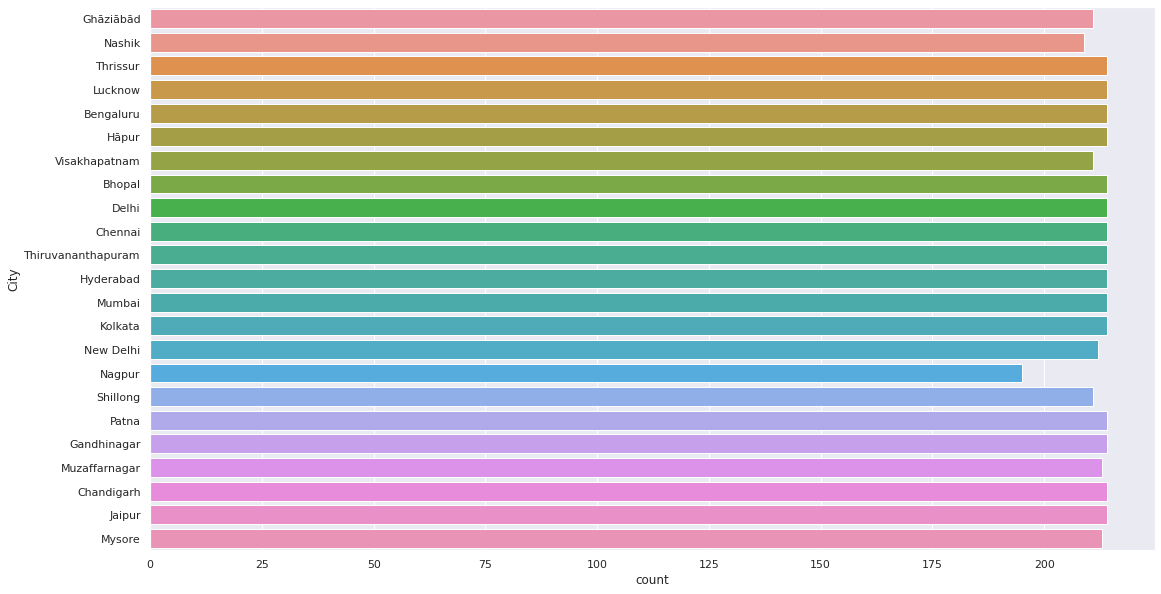

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf()

fig.set_size_inches(18, 10)

# Count of the pollutants data collectedd in each city
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="City", data=Main_Air_data)

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Comparing all the pollutants level in Ghaziabad in given timeline!
import plotly.express as px
# Data we will use:
Ghaziabad_data = Main_Air_data.loc[Main_Air_data['City'] == 'Ghāziābād']

fig = px.line(Ghaziabad_data, x='Date', y=Ghaziabad_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Nashik in given timeline!
import plotly.express as px
# Data we will use:
Nashik_data = Main_Air_data.loc[Main_Air_data['City'] == 'Nashik']
# Plotting the chart
fig = px.line(Nashik_data, x='Date', y=Nashik_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Thrissur in given timeline!
import plotly.express as px
# Data we will use:
Thrissur_data = Main_Air_data.loc[Main_Air_data['City'] == 'Thrissur']
# Plotting the chart
fig = px.line(Thrissur_data, x='Date', y=Thrissur_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Lucknow in given timeline!
import plotly.express as px
# Data we will use:
Lucknow_data = Main_Air_data.loc[Main_Air_data['City'] == 'Lucknow']
# Plotting the chart
fig = px.line(Lucknow_data, x='Date', y=Lucknow_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Bengaluru in given timeline!
import plotly.express as px
# Data we will use:
Bengaluru_data = Main_Air_data.loc[Main_Air_data['City'] == 'Bengaluru']
# Plotting the chart
fig = px.line(Bengaluru_data, x='Date', y=Bengaluru_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Hāpur in given timeline!
import plotly.express as px
# Data we will use:
Hāpur_data = Main_Air_data.loc[Main_Air_data['City'] == 'Hāpur']
# Plotting the chart
fig = px.line(Hāpur_data, x='Date', y=Hāpur_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Visakhapatnam in given timeline!
import plotly.express as px
# Data we will use:
Visakhapatnam_data = Main_Air_data.loc[Main_Air_data['City'] == 'Visakhapatnam']
# Plotting the chart
fig = px.line(Visakhapatnam_data, x='Date', y=Visakhapatnam_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Bhopal in given timeline!
import plotly.express as px
# Data we will use:
Bhopal_data = Main_Air_data.loc[Main_Air_data['City'] == 'Bhopal']
# Plotting the chart
fig = px.line(Bhopal_data, x='Date', y=Bhopal_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Delhi in given timeline!
import plotly.express as px
# Data we will use:
Delhi_data = Main_Air_data.loc[Main_Air_data['City'] == 'Delhi']
# Plotting the chart
fig = px.line(Delhi_data, x='Date', y=Delhi_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Chennai in given timeline!
import plotly.express as px
# Data we will use:
Chennai_data = Main_Air_data.loc[Main_Air_data['City'] == 'Chennai']
# Plotting the chart
fig = px.line(Chennai_data, x='Date', y=Chennai_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Thiruvananthapuram in given timeline!
import plotly.express as px
# Data we will use:
Thiruvananthapuram_data = Main_Air_data.loc[Main_Air_data['City'] == 'Thiruvananthapuram']
# Plotting the chart
fig = px.line(Thiruvananthapuram_data, x='Date', y=Thiruvananthapuram_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Hyderabad in given timeline!
import plotly.express as px
# Data we will use:
Hyderabad_data = Main_Air_data.loc[Main_Air_data['City'] == 'Hyderabad']
# Plotting the chart
fig = px.line(Hyderabad_data, x='Date', y=Hyderabad_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Mumbai in given timeline!
import plotly.express as px
# Data we will use:
Mumbai_data = Main_Air_data.loc[Main_Air_data['City'] == 'Mumbai']
# Plotting the chart
fig = px.line(Mumbai_data, x='Date', y=Mumbai_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Kolkata in given timeline!
import plotly.express as px
# Data we will use:
Kolkata_data = Main_Air_data.loc[Main_Air_data['City'] == 'Kolkata']
# Plotting the chart
fig = px.line(Kolkata_data, x='Date', y=Kolkata_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in New Delhi in given timeline!
import plotly.express as px
# Data we will use:
New_Delhi_data = Main_Air_data.loc[Main_Air_data['City'] == 'New Delhi']
# Plotting the chart
fig = px.line(New_Delhi_data, x='Date', y=New_Delhi_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Nagpur in given timeline!
import plotly.express as px
# Data we will use:
Nagpur_data = Main_Air_data.loc[Main_Air_data['City'] == 'Nagpur']
# Plotting the chart
fig = px.line(Nagpur_data, x='Date', y=Nagpur_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Shillong in given timeline!
import plotly.express as px
# Data we will use:
Shillong_data = Main_Air_data.loc[Main_Air_data['City'] == 'Shillong']
# Plotting the chart
fig = px.line(Shillong_data, x='Date', y=Shillong_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Patna in given timeline!
import plotly.express as px
# Data we will use:
Patna_data = Main_Air_data.loc[Main_Air_data['City'] == 'Patna']
# Plotting the chart
fig = px.line(Patna_data, x='Date', y=Patna_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Gandhinagar in given timeline!
import plotly.express as px
# Data we will use:
Gandhinagar_data = Main_Air_data.loc[Main_Air_data['City'] == 'Gandhinagar']
# Plotting the chart
fig = px.line(Gandhinagar_data, x='Date', y=Gandhinagar_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Muzaffarnagar in given timeline!
import plotly.express as px
# Data we will use:
Muzafarnagar_data = Main_Air_data.loc[Main_Air_data['City'] == 'Muzaffarnagar']
# Plotting the chart
fig = px.line(Muzafarnagar_data, x='Date', y=Muzafarnagar_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Chandigarh in given timeline!
import plotly.express as px
# Data we will use:
Chandigarh_data = Main_Air_data.loc[Main_Air_data['City'] == 'Chandigarh']
# Plotting the chart
fig = px.line(Chandigarh_data, x='Date', y=Chandigarh_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Jaipur in given timeline!
import plotly.express as px
# Data we will use:
Jaipur_data = Main_Air_data.loc[Main_Air_data['City'] == 'Jaipur']
# Plotting the chart
fig = px.line(Jaipur_data, x='Date', y=Jaipur_data.columns[3:9], markers=True)
fig.show()

In [ ]:
# Comparing all the pollutants level in Mysore in given timeline!
import plotly.express as px
# Data we will use:
Mysore_data = Main_Air_data.loc[Main_Air_data['City'] == 'Mysore']
# Plotting the chart
fig = px.line(Mysore_data, x='Date', y=Mysore_data.columns[3:9], markers=True)
fig.show()

#### From the above the figures, we can easily conclude various timeframes and cities in which the pollutants level are respectively low compare to other cities.

## Let's add the AQI level bucket column or the Dependant feature column that we need to predict :)

In [ ]:
# AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

Main_Air_data['A.Q.I']= round(Main_Air_data['A.Q.I'])

Main_Air_data["AQI_bucket_calculated"] = Main_Air_data['A.Q.I'].apply(lambda x: get_AQI_bucket(x))

Main_Air_data.head()

,Date,Country,City,pm25,so2,no2,co,o3,pm10,A.Q.I,AQI_bucket_calculated
0,2020-12-28,IN,Ghāziābād,149.0,35.70,39.20,16.75,15.65,169.5,170.0,Moderate
1,2020-12-28,IN,Nashik,116.5,3.35,20.25,15.05,20.10,54.5,116.0,Moderate
2,2020-12-28,IN,Thrissur,155.5,2.85,3.15,16.60,9.15,67.5,156.0,Moderate
3,2020-12-28,IN,Lucknow,383.5,6.10,46.70,41.80,16.05,544.5,544.0,Severe
4,2020-12-28,IN,Bengaluru,93.5,6.05,30.95,10.10,31.45,73.0,94.0,Satisfactory
